In [50]:
import yfinance as yf
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm

#https://www.investopedia.com/terms/m/montecarlosimulation.asp

                 Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2018-01-02  20.799999  21.474001  20.733334  21.368668   65283000          0   
2018-01-03  21.400000  21.683332  21.036667  21.150000   67822500          0   
2018-01-04  20.858000  21.236668  20.378668  20.974667  149194500          0   
2018-01-05  21.108000  21.149332  20.799999  21.105333   68868000          0   
2018-01-08  21.066668  22.468000  21.033333  22.427334  147891000          0   

            Stock Splits  
Date                      
2018-01-02           0.0  
2018-01-03           0.0  
2018-01-04           0.0  
2018-01-05           0.0  
2018-01-08           0.0  
                 Close
Date                  
2018-01-02   21.368668
2018-01-03   21.150000
2018-01-04   20.974667
2018-01-05   21.105333
2018-01-08   22.427334
...                ...
2023-04-24  162.550003
2023-04-25  160.669998
2023-04-26  153.7500

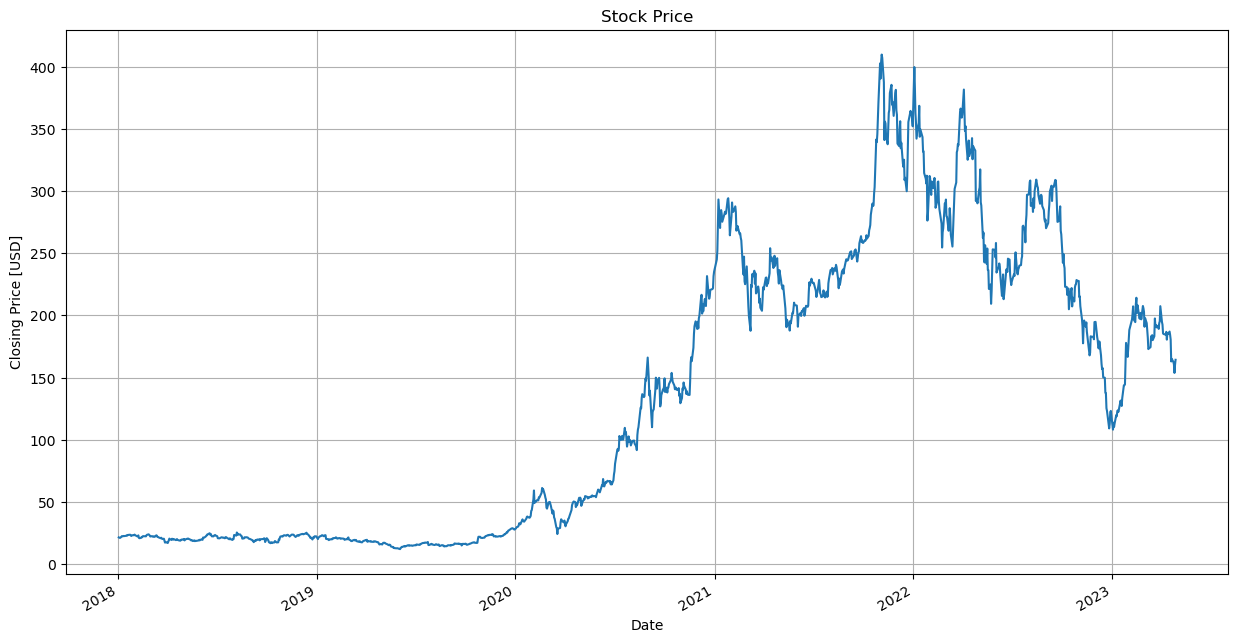

In [51]:
ticker = yf.Ticker('TSLA')
#historic data
start_date = '2018-01-01'
end_date = '2023-05-01'
hist = ticker.history(start=start_date, end=end_date)
print(hist.head())
#Closing prices from history
hist = hist[['Close']]
print(hist)
# Price Data
hist['Close'].plot(title="Stock Price", ylabel="Closing Price [USD]", figsize=[15, 8])
plt.grid()

In [52]:
# new lists: days to count, price and change as Lists
#CHANGE  is a list of percantage changes we use to get mean, std.deviation of changes of close prices
days = [i for i in range(1, len(hist['Close'])+1)]
price_last = hist['Close'].tolist()
change = hist['Close'].pct_change().tolist()
change = change[1:]
# Removing the first item because we cannot substract anything from it
#values for Monte Carlo
mean = np.mean(change)
std_dev = np.std(change)
print('Mean percent change is: ' + str(round(mean*100, 2)) + '%')
print('Standard deviation of percent change is: ' +
str(round(std_dev*100, 2)) + '%')





Mean percent change is: 0.24%
Standard deviation of percent change is: 4.13%


In [53]:
price_last = hist['Close'].tolist()
price_last

[21.368667602539062,
 21.149999618530273,
 20.974666595458984,
 21.10533332824707,
 22.42733383178711,
 22.246000289916992,
 22.31999969482422,
 22.530000686645508,
 22.4146671295166,
 22.67066764831543,
 23.143999099731445,
 22.971332550048828,
 23.334667205810547,
 23.437332153320312,
 23.519332885742188,
 23.05933380126953,
 22.50933265686035,
 22.856666564941406,
 23.302000045776367,
 23.05466651916504,
 23.62066650390625,
 23.28333282470703,
 22.916667938232422,
 22.208667755126953,
 22.264667510986328,
 23.0,
 21.01533317565918,
 20.69466781616211,
 21.048667907714844,
 21.577333450317383,
 21.487333297729492,
 22.271333694458008,
 22.365999221801758,
 22.31800079345703,
 22.219999313354492,
 23.077999114990234,
 23.469999313354492,
 23.827999114990234,
 23.39933204650879,
 22.87066650390625,
 22.062000274658203,
 22.341333389282227,
 22.22333335876465,
 21.8799991607666,
 22.15333366394043,
 21.940000534057617,
 21.81133270263672,
 23.034000396728516,
 22.78933334350586,
 21.775

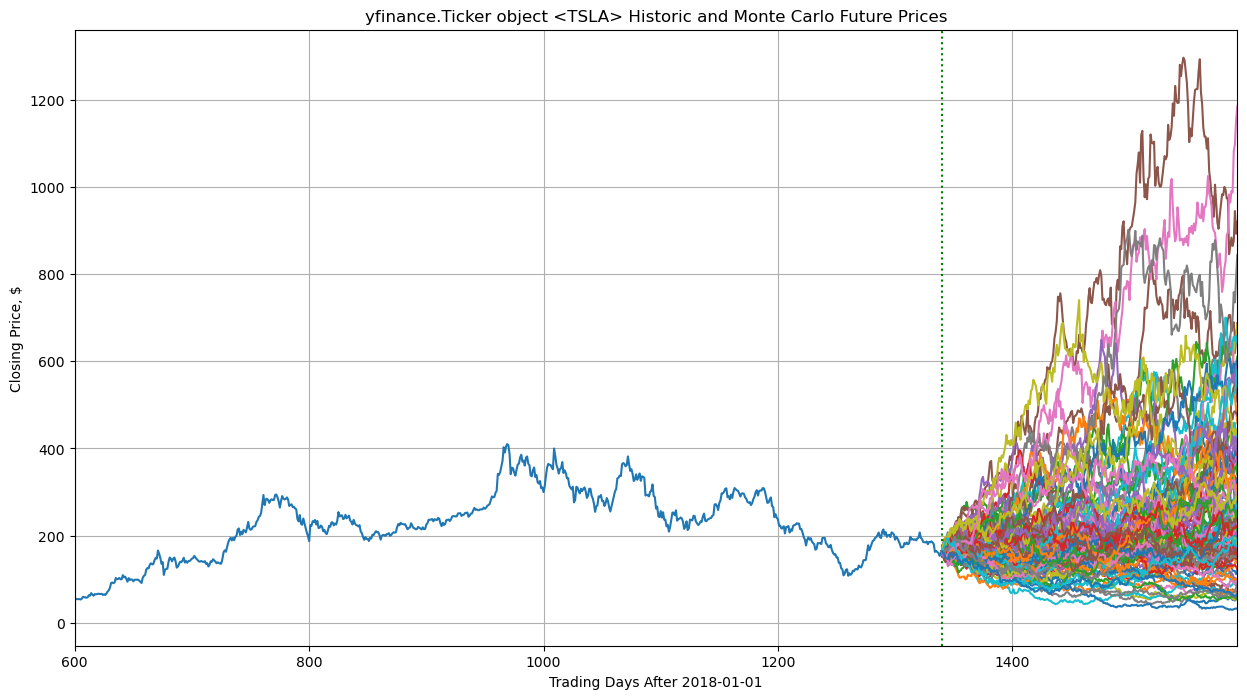

In [54]:
#Simulation or number of iterations and future prediction time period
simulations = 100  
sim_days = 1*252 # number od trading days in 1 year

# historic plot
fig = plt.figure(figsize=[15, 8])
plt.plot(days, price_last)
plt.title(f"{ticker} Historic and Monte Carlo Future Prices")
plt.xlabel('Trading Days After ' + start_date)

plt.ylabel("Closing Price, $")
plt.axvline(x=days[-1], label='Current date', color='green', ls=':')
plt.xlim([600, len(days)+sim_days]) #SMANJIT OVAJ LIMit
plt.grid()



# Initializing Lists for Analysis
close_end = []
profitable = []

# For Loop for number of simulations  
for i in range(simulations):
        num_days = [days[-1]]
        close_price = [hist.iloc[-1, 0]]
    
        # For Loop for Number of Days to Predict
        for j in range(sim_days):
            num_days.append(num_days[-1]+1) #zadnji dan u listi plus 1 
            perc_change = norm.ppf(random(), loc=mean, scale=std_dev) #random vrijednost u normalnoj distribuciji
            close_price.append(close_price[-1]*(1+perc_change)) #zadnja cijena u listi + ista ta* random rast
#danasnja close price je close proslog dana plus postotak rasta u odnosu na prosli dan; 
#postotak rasta znamo kad dobijemo danasnju cijenu u odnosu na proslu..predikcije radimo random odabranim
# postotkom rasta odabrane cijene dionica
        if close_price[-1] > price_last[-1]:
            profitable.append(1)
        else:
            profitable.append(0)
        close_end.append(close_price[-1])
        #future plot, INDENT TI JE VAZAN
        plt.plot(num_days, close_price)

#method norm.ppf() takes a percentage and returns a standard deviation multiplier
#for what value that percentage occurs at
#https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf

#  loc and scale parameters let you adjust the location and scale of a distribution. For example, to model IQ data, 
# you'd build iq = scipy.stats.norm
# (loc=100, scale=15) because IQs are constructed so as to have a mean of 100 and a standard deviation of 15.
# https://stats.stackexchange.com/questions/560281/what-is-the-meaning-of-loc-and-scale-for-the-distributions-in-scipy-stats

In [55]:
num_days = [days[-1]]
num_days

[1340]

In [56]:
num_days = [days[-2]]
num_days

[1339]

In [57]:
# Average (avg) closing price of stocks and probability of it's increasing after 1 xear of trading (chosen days)
avg_closing_price = sum(close_end)/simulations
avg_perc_change = (avg_closing_price-price_last[-1])/price_last[-1]

probability_of_increase = sum(profitable)/simulations

print('Expected closing price after '+ str(simulations) +'simulations: USD ' + str(round(avg_closing_price,2)))

print('Expected percent increase after 1 year: '+str(round(avg_perc_change*100, 2)) + '%')

print('Probability of price increase after 1 year: '+str(round(probability_of_increase*100, 2)) + '%')
 



 


Expected closing price after 100simulations: USD 283.85
Expected percent increase after 1 year: 72.75%
Probability of price increase after 1 year: 71.0%


In [58]:
#razlicite simulacije ili pokusaji daju razlicitu procjenu rasta ili pada, tj kretanja cijena i odnosa s prošlim cijenama

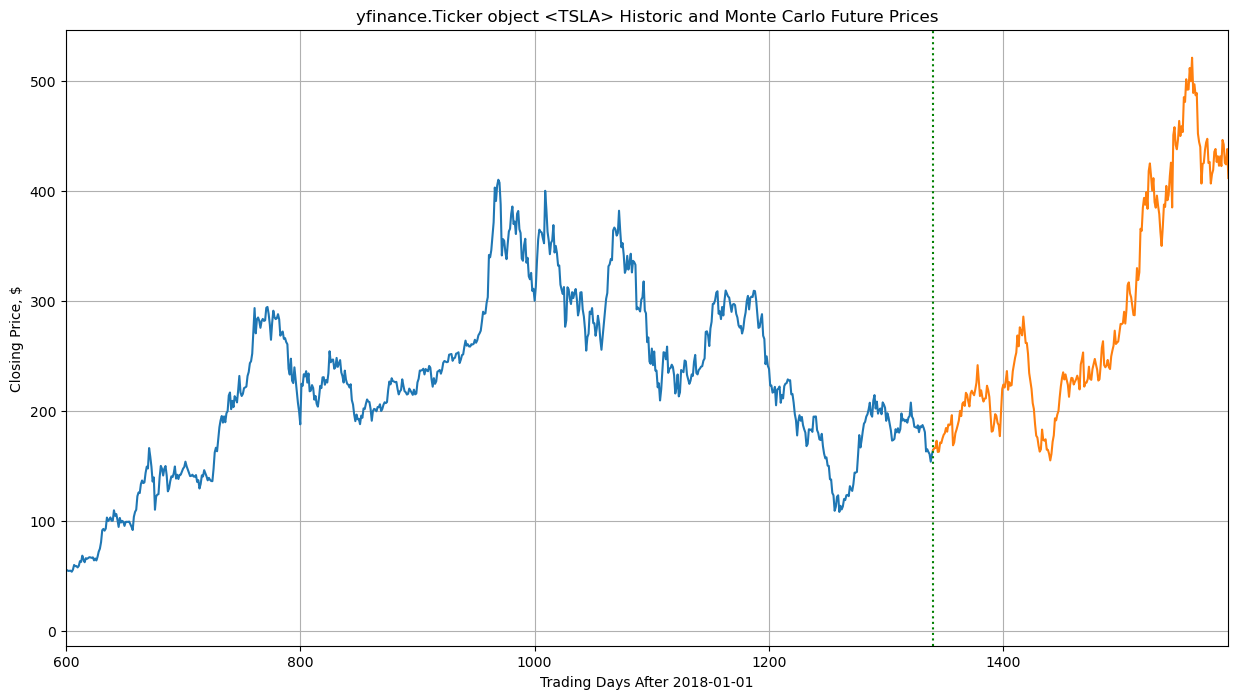

In [60]:
#Example od only 1 simulation/iterations and future prediction time period
simulations = 1  
sim_days = 1*252 # number od trading days in 1 year

# historic plot
fig = plt.figure(figsize=[15, 8])
plt.plot(days, price_last)
plt.title(f"{ticker} Historic and Monte Carlo Future Prices")
plt.xlabel('Trading Days After ' + start_date)

plt.ylabel("Closing Price, $")
plt.axvline(x=days[-1], label='Current date', color='green', ls=':')
plt.xlim([600, len(days)+sim_days]) #SMANJIT OVAJ LIMit
plt.grid()


# Initializing Lists for Analysis
close_end = []
profitable = []

# For Loop for number of simulations 
for i in range(simulations):
        num_days = [days[-1]]
        close_price = [hist.iloc[-1, 0]]
    
        # For Loop for number of days to predict
        for j in range(sim_days):
            num_days.append(num_days[-1]+1)
            perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
            close_price.append(close_price[-1]*(1+perc_change))
        if close_price[-1] > price_last[-1]:
            profitable.append(1)
        else:
            profitable.append(0)
        close_end.append(close_price[-1])
        #plot future values  #INDENT ti je vazan, ide na svih 
        plt.plot(num_days, close_price)
